Total patches: 18078
Image batch shape: torch.Size([4, 3, 64, 64])
Mask batch shape: torch.Size([4, 1, 64, 64])
[NaN Check] images.nan: False, masks.nan: False
[Min/Max] images: 0.010 to 0.214
[Min/Max] masks: 0.000 to 1.000


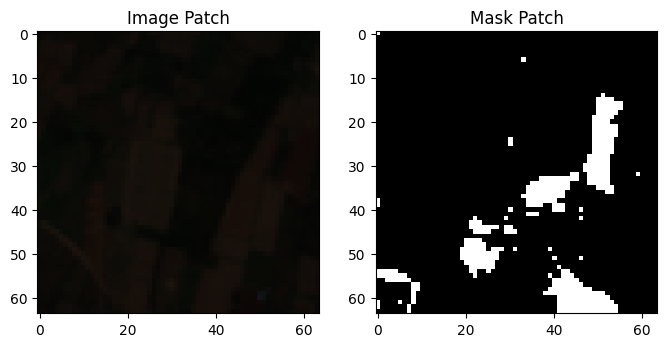

In [6]:
import sys
sys.path.append(r'C:\Users\khuza\OneDrive\Desktop\Data science course\DATA SCIENCE COURSE\PROJECTS\AI-DRIVEN SATELLITE ANALYSIS\scripts')  # or full path if needed

from data_loader import PatchDataset

import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Update this path to match your extracted patches location
patch_dir = r"C:\Users\khuza\OneDrive\Desktop\Data science course\DATA SCIENCE COURSE\PROJECTS\AI-DRIVEN SATELLITE ANALYSIS\data\patches"

# Load dataset
dataset = PatchDataset(patch_dir=patch_dir)

# Check dataset length
print(f"Total patches: {len(dataset)}")

# Load a batch of 4 patches
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Get one batch
images, masks = next(iter(dataloader))
print(f"Image batch shape: {images.shape}")
print(f"Mask batch shape: {masks.shape}")

# Check for NaNs
print(f"[NaN Check] images.nan: {torch.isnan(images).any().item()}, masks.nan: {torch.isnan(masks).any().item()}")
print(f"[Min/Max] images: {images.min().item():.3f} to {images.max().item():.3f}")
print(f"[Min/Max] masks: {masks.min().item():.3f} to {masks.max().item():.3f}")

# Plot first image & mask
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(images[0].permute(1, 2, 0).numpy())
plt.title("Image Patch")

plt.subplot(1, 2, 2)
plt.imshow(masks[0][0].numpy(), cmap='gray')
plt.title("Mask Patch")
plt.show()
